In [110]:
# load packages
import numpy as np 
import scipy 
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
import mne
from mne.viz import plot_topomap
from mne.io import RawArray
import numpy.matlib
import scipy.stats as stats 
sns.set_theme() # set the plotting atmosphere

In [111]:
def ConcateAllDataperCo(NumSubs,AttnX_bool,GoodSubjArr,xFxData,xFX_Ind):
    """Concates all subj data into a 4d array
        DictIn = Dict of all data 
        AttnX_bool and GoodSubjArr = binary bools to sort data
        xFx_Ind = keys for all haronic and hemifield data
        Returns::: Dict with 2 keys (attnL and attnR conditions given xFx)"""
    AllData_perSubjCo = {}
    co_temp1 = []
    co_temp2 = []
    for suIn in range(NumSubs):
        if AttnX_bool[suIn] and GoodSubjArr[suIn] == 1:
            co_temp1.append(xFxData[suIn][xFX_Ind])

        if AttnX_bool[suIn] == 0 and GoodSubjArr[suIn] == 1:
            co_temp2.append(xFxData[suIn][xFX_Ind])

    AllData_perSubjCo[0] = np.array(co_temp1) # all attnL data
    AllData_perSubjCo[1] = np.array(co_temp2) # all attnR data
    return AllData_perSubjCo

In [112]:
crayons = sns.color_palette("hls", 8)

In [133]:
NumBins = 6
NumChans = 128
contrast_levels=np.array([1, 3, 5, 16, 40, 100])
cll=['1%', '3%', '5%', '16%', '40%', '100%']
ttl = ['2f1','4f1','6f1','8f1','2f2','4f2','6f2','8f2']
chan_arr = np.arange(0,NumChans,1)
# elec_Arc1_outer = [68,64,58,51,47,42,37,31,    80,87,93,98,97,96,95,94]
# elec_Arc2 = [73,69,65,59,52,53,54,  55,  79,86,92,91,90,89,88]
# elec_Arc3 = [74,70,66,60,61,  78,85,84,83,82,  81]
# elec_Arc4_inner = [71,67,62,77,76,75,     72]
# AllAnalysisChans = np.concatenate([elec_Arc1_outer,elec_Arc2,elec_Arc3,elec_Arc4_inner])
# #AllAnalysisChans = np.concatenate([elec_Arc2,elec_Arc3,elec_Arc4_inner])
# AnalysisChans = np.unique(AllAnalysisChans) - 1
# VisChans = np.sort(AnalysisChans)
# print(f'Channels to be visualized: {VisChans}')
# ch_list = np.arange(0,NumChans,1)
# ocm = np.zeros_like((ch_list))
# ocm[VisChans] = True # set good chans to true
# ocm_chans = ocm.astype(bool)

In [114]:
# Main Directory of processed file from MatLab
MainDir = 'C:\\plimon\\LTP_analysis\\eegMatFiles\\AllMat' # set dir
os.chdir(MainDir) # change old dir, to this dir
dataFileNames = os.listdir(MainDir) # list files in dir
print(f'Total Files Avilable: {len(dataFileNames)}')
##############################################
FileN = dataFileNames[4]# choose one                        
file_path1 = os.path.join(MainDir, FileN) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

Total Files Avilable: 5
Current WD: C:\plimon\LTP_analysis\eegMatFiles\AllMat\AllSubj_MatFiles_ri_C1_20240502_151155.pkl
Does File #1 Exist? True


In [115]:
loadData = pkl.load(open(file_path1, 'rb'))
print(loadData.keys())
xFxData = loadData['EEGData']
FileNames = loadData['SubIDs']
RealImaginary = loadData['RealImaginaryData_sIns']
NumSubs = int(len(FileNames))
print(f'Total Number of Data Files: {NumSubs}')
str_catch = '-'
SubjID = np.array([file_name.split(str_catch)[1] for file_name in FileNames])
AttnX_Condition = np.array([file_name.split(str_catch)[2] for file_name in FileNames])
UniqueSubjs, SessionsComp = np.unique(SubjID, return_counts = True)
print(f'{int(len(UniqueSubjs))} Total Subjects')
print(f'{np.sum(SessionsComp == 2)} subjects completed both sessions')
print(SubjID) # subject ids 

dict_keys(['RealImaginaryData_sIns', 'EEGData', 'SubIDs'])
Total Number of Data Files: 50
32 Total Subjects
18 subjects completed both sessions
['2652' '2655' '2657' '2658' '2661' '2661' '2663' '2664' '2665' '2665'
 '2666' '2666' '2667' '2667' '2668' '2668' '2669' '2669' '2670' '2670'
 '2671' '2671' '2672' '2672' '2674' '2674' '2676' '2677' '2677' '2678'
 '2695' '2695' '2696' '2696' '2697' '2697' '2708' '2716' '2726' '2727'
 '2728' '2728' '2733' '2734' '345202' '345202' '345215' '345215' '345216'
 '345216']


In [116]:
AttnX_bool = np.zeros((NumSubs))
AttnX_bool = [1 if 'attnL' in x else 0 for x in AttnX_Condition]
print(f'Total AttnL files: #{np.sum(AttnX_bool)}')

GoodSubjArr = np.ones(NumSubs)
BadSubs = ['2699']
# BadSubs = ['2663','2734','2652']
GoodSubs_bool = [1 if good_subj and x not in BadSubs else 0 for x, good_subj in zip(SubjID, GoodSubjArr)]
print(np.unique(GoodSubs_bool, return_counts = True))

Total AttnL files: #26
(array([1]), array([50], dtype=int64))


In [117]:
# CleanData = {}
# for allConds in range(8):
#     CleanData[allConds] = ConcateAllDataperCo(NumSubs, AttnX_bool,GoodSubjArr,xFxData,xFX_Ind = allConds)

In [118]:
print(xFxData.keys())
print(xFxData[0].keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7])


In [147]:
def GetReal_Imaginary_Data(RealImaginary,sIn, harmonicInd):
    # store all values per contrast
    ComplexValuesPerBin = np.zeros((NumBins,2,2,NumChans)) # Contrast x Pre/Post x Real/Imaginary x 128 Channels

    fIn = RealImaginary[sIn][harmonicInd]
    condition_split = int((fIn.shape[3])/ 2)

    for c in range(NumBins):
        contrastInd = c
        # pre post index
        lo_c = fIn[contrastInd,:,:,:condition_split] # lowest contrast at 1%, 
        lo_c_post = fIn[contrastInd,:,:,condition_split:] 
        pre_post_set = [lo_c,lo_c_post] # group pre / post data for loop
        complexVals = np.zeros((2,2,(NumChans))) # pre/post x real/imaginary x all channels
        # average real and imaginary values per single channel for respective trials
        for ppsi in range(len(pre_post_set)): # pre post set index
            dsIn= pre_post_set[ppsi] # import pre or post 
            for ch in range((NumChans)):
                realData = dsIn[0,ch,:] # index real values per 1 channel for all trials
                imagData = dsIn[1,ch,:] # index imaginary values per 1 channel for all trials
                r_avg = np.nanmean(realData) # returns 1 values per channel
                i_avg = np.nanmean(imagData) # returns 1 value per channel
                complexVals[ppsi,0,ch] = r_avg
                complexVals[ppsi,1,ch] = i_avg

                ComplexValuesPerBin[c,:,:,:] = complexVals
    return ComplexValuesPerBin

In [152]:
test = GetReal_Imaginary_Data(RealImaginary,sIn = 0, harmonicInd = 0)
print(test.shape)
fig,axs = plt.subplots(6,2,figsize = (8,20),sharey = True)
for c in range(NumBins):
    for ppsi in range(2): # pre post set index
        for re_im in range(2):
            pltData = test[c,ppsi,re_im]
            axs[c,ppsi].scatter(chan_arr,pltData, label = f'{coStatus[ppsi]} {riStatus[re_im]}')
            axs[c,ppsi].legend()
            axs[c,ppsi].set_title(f'contrast at {cll[c]}')

(6, 2, 2, 128)


In [146]:
# workbench to iteract across all contrasts
sIn = 0 # subject number index
harmonicInd = 0 # 2fx 4fx 6fx 8fx   1-8
# contrastInd = 0



# store all values per contrast
ComplexValuesPerBin = np.zeros((NumBins,2,2,NumChans)) # Contrast x Pre/Post x Real/Imaginary x 128 Channels

fIn = RealImaginary[sIn][harmonicInd]
condition_split = int((fIn.shape[3])/ 2)

for c in range(NumBins):
    contrastInd = c
    # pre post index
    lo_c = fIn[contrastInd,:,:,:condition_split] # lowest contrast at 1%, 
    lo_c_post = fIn[contrastInd,:,:,condition_split:] 
    pre_post_set = [lo_c,lo_c_post] # group pre / post data for loop
    complexVals = np.zeros((2,2,(NumChans))) # pre/post x real/imaginary x all channels
    # average real and imaginary values per single channel for respective trials
    for ppsi in range(len(pre_post_set)): # pre post set index
        dsIn= pre_post_set[ppsi] # import pre or post 
        for ch in range((NumChans)):
            realData = dsIn[0,ch,:] # index real values per 1 channel for all trials
            imagData = dsIn[1,ch,:] # index imaginary values per 1 channel for all trials
            r_avg = np.nanmean(realData) # returns 1 values per channel
            i_avg = np.nanmean(imagData) # returns 1 value per channel
            complexVals[ppsi,0,ch] = r_avg
            complexVals[ppsi,1,ch] = i_avg

            ComplexValuesPerBin[c,:,:,:] = complexVals

(6, 2, 2, 128)


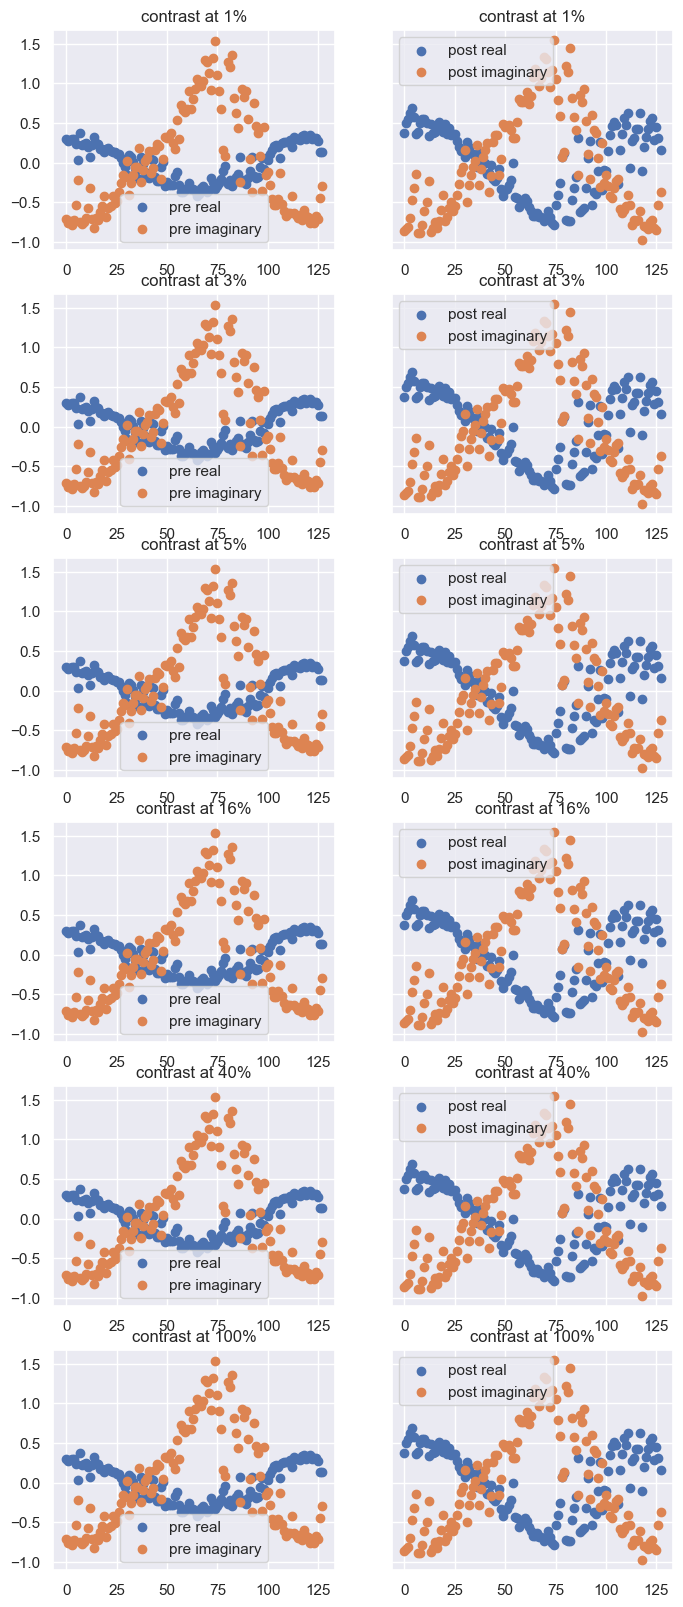

In [144]:
print(ComplexValuesPerBin.shape)

fig,axs = plt.subplots(6,2,figsize = (8,20),sharey = True)
coStatus = ['pre', 'post']
riStatus = ['real', 'imaginary']

for c in range(NumBins):
    for ppsi in range(2): # pre post set index
            for re_im in range(2):
                    pltData = ComplexValuesPerBin[c,ppsi,re_im]
                    axs[c,ppsi].scatter(chan_arr,complexVals[ppsi,re_im,:], label = f'{coStatus[ppsi]} {riStatus[re_im]}')
                    axs[c,ppsi].legend()
                    axs[c,ppsi].set_title(f'contrast at {cll[c]}')

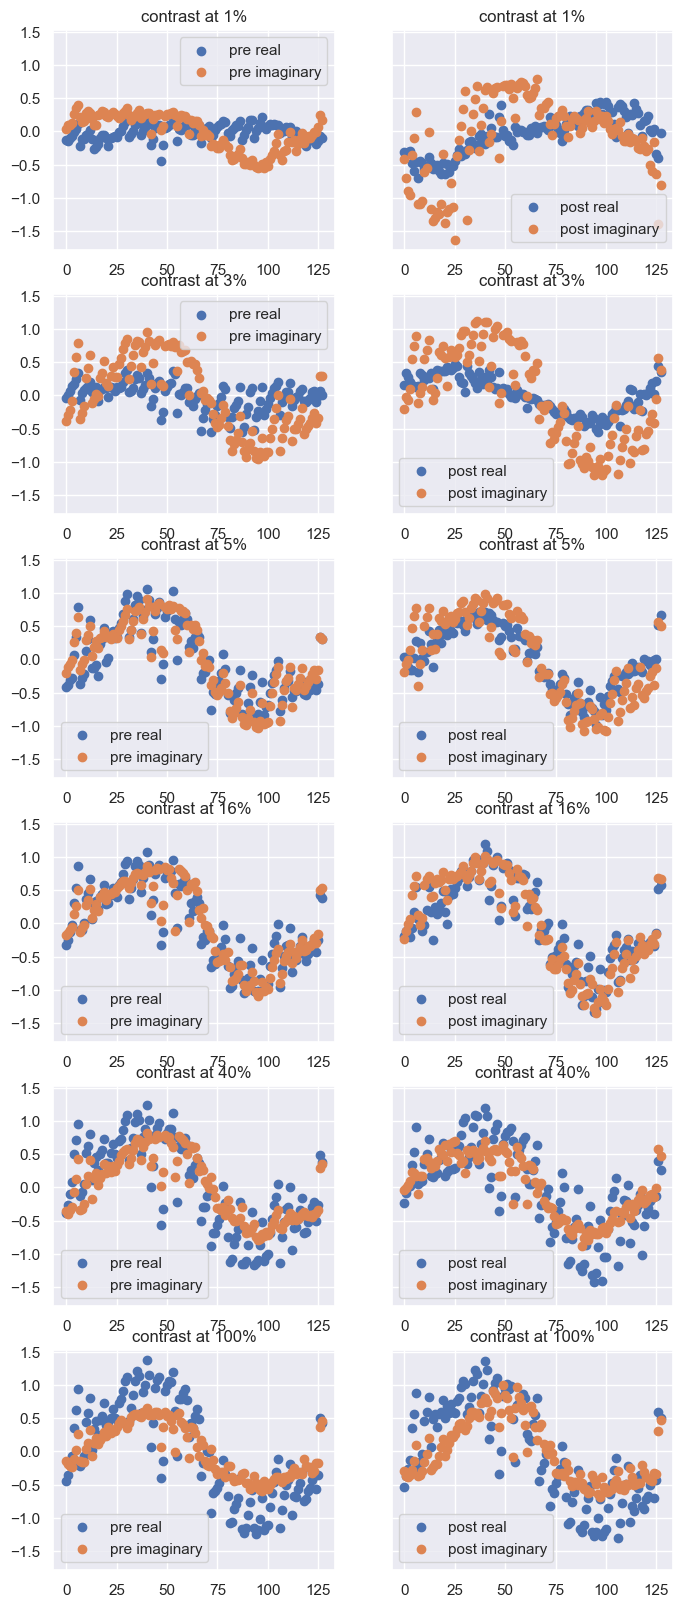

In [140]:
# workbench to iteract across all contrasts
sIn = 0 # subject number index
harmonicInd = 4 # 2fx 4fx 6fx 8fx   1-8
# contrastInd = 0

fIn = RealImaginary[sIn][harmonicInd]
condition_split = int((fIn.shape[3])/ 2)
fig,axs = plt.subplots(6,2,figsize = (8,20),sharey = True)
#print(f'{condition_split}')

for c in range(NumBins):
    contrastInd = c
    # pre post index
    lo_c = fIn[contrastInd,:,:,:condition_split] # lowest contrast at 1%, 
    lo_c_post = fIn[contrastInd,:,:,condition_split:] 
    pre_post_set = [lo_c,lo_c_post] # group pre / post data for loop
    complexVals = np.zeros((2,2,(NumChans))) # pre/post x real/imaginary x all channels
    # average real and imaginary values per single channel for respective trials
    for ppsi in range(len(pre_post_set)): # pre post set index
        dsIn= pre_post_set[ppsi] # import pre or post 
        for ch in range((NumChans)):
            realData = dsIn[0,ch,:] # index real values per 1 channel for all trials
            imagData = dsIn[1,ch,:] # index imaginary values per 1 channel for all trials
            r_avg = np.nanmean(realData) # returns 1 values per channel
            i_avg = np.nanmean(imagData) # returns 1 value per channel
            complexVals[ppsi,0,ch] = r_avg
            complexVals[ppsi,1,ch] = i_avg

    # fig,axs = plt.subplots(1,2,figsize = (8,3))
    coStatus = ['pre', 'post']
    riStatus = ['real', 'imaginary']
    for ppsi in range(len(pre_post_set)):
        for real_imag in range(len(pre_post_set)):
            axs[c,ppsi].scatter(chan_arr,complexVals[ppsi,real_imag,:], label = f'{coStatus[ppsi]} {riStatus[real_imag]}')
            axs[c,ppsi].legend()
            axs[c,ppsi].set_title(f'contrast at {cll[c]}')

39


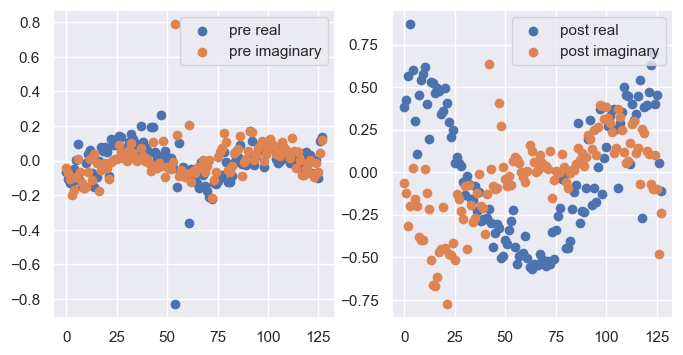

In [132]:
sIn = 0 # subject number index
harmonicInd = 0 # 2fx 4fx 6fx 8fx   1-8
contrastInd = 0

fIn = RealImaginary[sIn][harmonicInd]
condition_split = int((fIn.shape[3])/ 2)
#print(f'{condition_split}')
# pre post index
lo_c = fIn[contrastInd,:,:,:condition_split] # lowest contrast at 1%, 
lo_c_post = fIn[contrastInd,:,:,condition_split:] 
pre_post_set = [lo_c,lo_c_post] # group pre / post data for loop

complexVals = np.zeros((2,2,(NumChans))) # pre/post x real/imaginary x all channels

# average real and imaginary values per single channel for respective trials
for ppsi in range(len(pre_post_set)): # pre post set index
    dsIn= pre_post_set[ppsi] # import pre or post 
    for ch in range((NumChans)):
        realData = dsIn[0,ch,:] # index real values per 1 channel for all trials
        imagData = dsIn[1,ch,:] # index imaginary values per 1 channel for all trials
        r_avg = np.nanmean(realData) # returns 1 values per channel
        i_avg = np.nanmean(imagData) # returns 1 value per channel
        complexVals[ppsi,0,ch] = r_avg
        complexVals[ppsi,1,ch] = i_avg

fig,axs = plt.subplots(1,2,figsize = (8,4))
coStatus = ['pre', 'post']
riStatus = ['real', 'imaginary']
for ppsi in range(len(pre_post_set)):
    for real_imag in range(len(pre_post_set)):
        axs[ppsi].scatter(chan_arr,complexVals[ppsi,real_imag,:], label = f'{coStatus[ppsi]} {riStatus[real_imag]}')
        axs[ppsi].legend()
# plt.title('pre/post real/imaginary average channel activity across all trials')
# plt.scatter(chan_arr,complexVals[0,:],color = 'black',label = 'real')
# plt.scatter(chan_arr,complexVals[1,:],color = 'blue', label = 'imaginary')
# plt.legend()
# plt.show()

In [ ]:
# Haromic_Data_Ind = 0
# print(f'Importing {ttl[Haromic_Data_Ind]} and {ttl[Haromic_Data_Ind+4]}')
# doi = [CleanData[Haromic_Data_Ind],CleanData[Haromic_Data_Ind+4]]

